In [128]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [21]:
import nltk

In [22]:
train = pd.read_csv("data/train.csv")

In [23]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [24]:
for index,row in train.sample(5).iterrows():
    print(str(row['id']) + ":" + row['text'] + " =" + str(row['target']))
    print (" ")

10667:Woodlawn Shooting Wounds 79-Year-Old Woman Teen - Woodlawn - http://t.co/nu3XXn55vS Chicago http://t.co/XNGrfNQSx3 =1
 
1350:HEY LOOK!!!  Kash's Foundation Live for Today got blown up on People Magazine's website!!  

Todd Blake... http://t.co/2Fenu1SYu6 =0
 
5556:Photo: Beach Earrings Beach Jewelry Vacation Earrings Keep Calm and Beach On Earrings Made with Flattened... http://t.co/rjEbpiB5rZ =0
 
6472:4 dead dozens injured in Gaza blast near house leveled in summer war - Washington Post  http://t.co/AXXDCaKzTY #World =1
 
2089:RT @GreenHarvard: Documenting climate change's first major casualty http://t.co/4q4zd7oU34 via @GreenHarvard =1
 


In [25]:
train.isnull().sum()


id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [26]:
train.shape

(7613, 5)

Tasks:
    
- get word counts for 0 and 1 labels
- https://towardsdatascience.com/exploratory-data-analysis-for-natural-language-processing-ff0046ab3571 
- https://monkeylearn.com/text-analysis/ 

In [27]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [77]:
import collections
from nltk.corpus import stopwords  
import string
import seaborn as sns


Refs: 

https://www.geeksforgeeks.org/removing-stop-words-nltk-python/ --> for stopwords

In [78]:
# get list of stopwords
nltk.download("stopwords")
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tejasphaterpekar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [79]:
# Get a list of all text entries
tweet_collection = [tweet for tweet in train['text']]

# concatenate into 1 large text base 
corpus = " ".join(tweet_collection)

Let's start by doing a word frequency analysis to see what the most popular words are

In [80]:
counter = collections.Counter(corpus.lower().split())

In [81]:
#establish stopped word dictionary
stopped_words = collections.defaultdict(int)

In [82]:
# Searching and removing stopwords
for stop_word in list(stop_words):
    if stop_word in counter.keys():
        stopped_words[stop_word] = counter[stop_word]
        del counter[stop_word]


In [83]:
# looks for any entries with just punctuation
to_delete = []
for k in counter.keys():
    if all(j in string.punctuation for j in k):
        to_delete.append(k)

In [91]:
# remove any words that only contain punctuation
for word in to_delete: 
    del counter[word]

In [99]:
pop_words = counter.most_common()

In [102]:
x = []
y = []
for word, count  in pop_words[:20]:
    x.append(word)
    y.append(count)

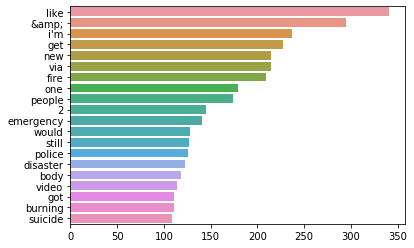

In [103]:
sns.barplot(x = y, y = x)

After removing punctuation, we can see some interesting words in our top 20. "like" is a pretty common slang word so I'm not surprised its at the very top. It's also used a lot in comparisons. "&amp" seems to be a html syntax and is probably an artifact in this case for other symbols. We also see high positions for "fire", "emergency", "police", "disaster", "burning", "suicide". This group is what we would semantically think of as disaster-likely words, although context shouldn't be underestimated. Finally I'm not sure why the number 2 is so high in cunts. Could be a short hand for the word "to" or "too".

In [118]:
import statistics

In [119]:
# Using tweet collection from above exploration
tweet_collection[0]

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

In [120]:
# slightly complicated code, and perhaps a little inefficient?
# basically split each sentence into a list of words (while still maintaining the initial list)
# then get word lengths and average these numbers (thus collapsing the internal lists)
avg_word_length = list(map(lambda x: statistics.mean(len(y) for y in x), [x.split() for x in tweet_collection]))

In [121]:
# list(map(lambda x: len(x.split()), tweet_collection)) --> equivalent code for below

In [122]:
word_counts = [len(x.split()) for x in tweet_collection]

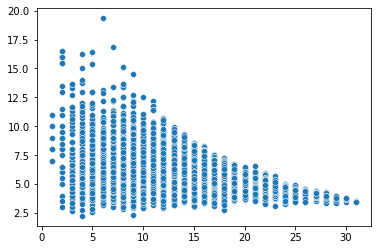

In [124]:
sns.scatterplot(x = word_counts, y = avg_word_length)

There does seem to be a slightly decreasing trend in tweet lengths and the avg length of the word (mostly explained by variability d/t sentence length) --> not very useful

In [111]:
# Get word counts for each entry
train["word_counts"] = train['text'].apply(lambda x: len(x.split()))
train.head()

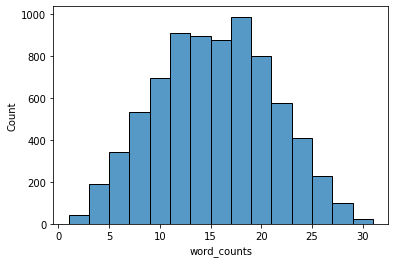

In [115]:
# Let's visualize the word counts
sns.histplot(data = train, x = 'word_counts', binwidth = 2)

- word counts are ~ normally distributed

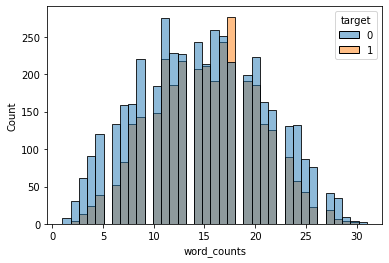

In [116]:
sns.histplot(data = train, x = 'word_counts', hue = 'target')

- not much of a shift here in density

for fun, let's look at avg word length vs word count, colored for target

In [125]:
# from above
train['avg_word_length'] = avg_word_length

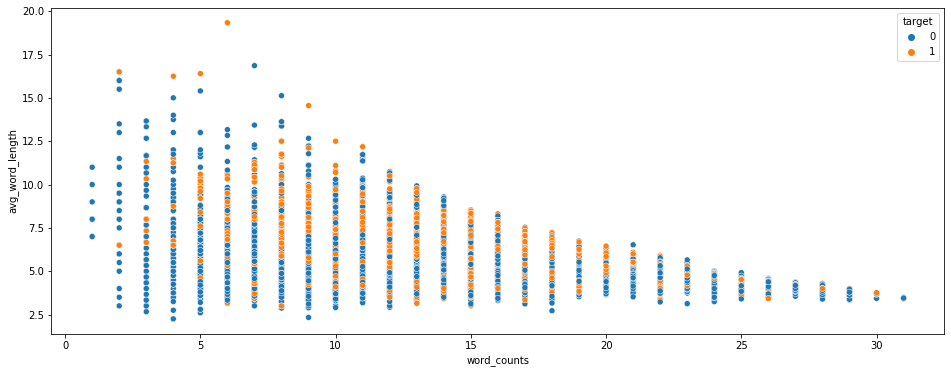

In [129]:
plt.figure(figsize=(16, 6))
sns.scatterplot(data = train, x = 'word_counts', y = 'avg_word_length', hue = 'target')

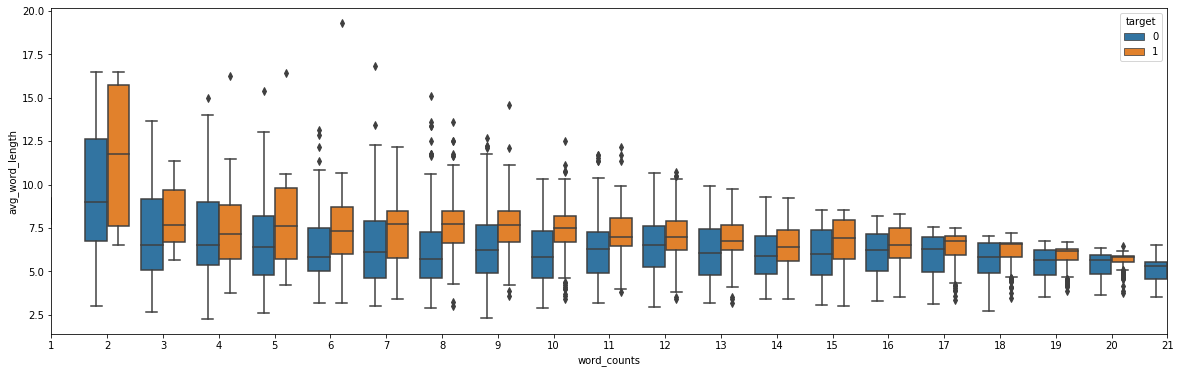

In [134]:
plt.figure(figsize=(20, 6))
sns.boxplot(data = train, x = 'word_counts', y = 'avg_word_length', hue = 'target')
plt.xlim(0,20)
plt.show()

This is a pretty limited visualization, but it does seem like there is a slight trend where disaster tweets that have a few words often have long average word lengths, compared to non disaster tweets which only have a few words. This is mostly based on the means and quartiles. 

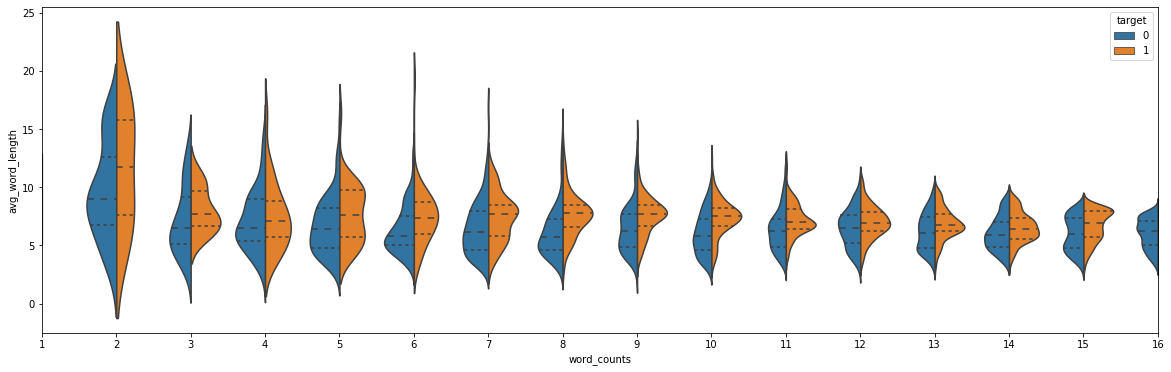

In [139]:
plt.figure(figsize=(20, 6))
sns.violinplot(data = train, x = 'word_counts', y = 'avg_word_length', hue = 'target', split = True, inner = 'quart')
plt.xlim(0,15)
plt.show()

Violin plots are a bit more informative. There does seem to be some density differences, but actually the most distinct differences are from a word-count of 7 and beyond (to about 13).

## Sentiment Analysis Segment

- https://medium.com/analytics-vidhya/simplifying-social-media-sentiment-analysis-using-vader-in-python-f9e6ec6fc52f 

Hutto, C.J. & Gilbert, E.E. (2014). VADER: A Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text. Eighth International Conference on Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014.

In [25]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [26]:
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/tejasphaterpekar/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [27]:
pos_test = "The dog is happy"
neg_test = "You look so ugly"

In [28]:
sid.polarity_scores(pos_test)

{'neg': 0.0, 'neu': 0.448, 'pos': 0.552, 'compound': 0.5719}

In [29]:
sid.polarity_scores(neg_test)

{'neg': 0.586, 'neu': 0.414, 'pos': 0.0, 'compound': -0.6418}

In [30]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [31]:
# from https://stackoverflow.com/questions/61608057/output-vader-sentiment-scores-in-columns-based-on-dataframe-rows-of-tweets 
train['positive'] = [sid.polarity_scores(x)['pos'] for x in train['text']]
train['negative'] = [sid.polarity_scores(x)['neg'] for x in train['text']]
train['neutral'] = [sid.polarity_scores(x)['neu'] for x in train['text']]
train['compound'] = [sid.polarity_scores(x)['compound'] for x in train['text']]

In [32]:
train.head()

,id,keyword,location,text,target,positive,negative,neutral,compound
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,0.149,0.000,0.851,0.2732
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,0.000,0.286,0.714,-0.3400
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,0.000,0.095,0.905,-0.2960
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,0.000,0.000,1.000,0.0000
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,0.000,0.000,1.000,0.0000


In [34]:
# small experiement to see how compound predicts sentiment
train['analyzer_pred'] =  train['compound'].apply(lambda x: 1 if x > 0 else 0)

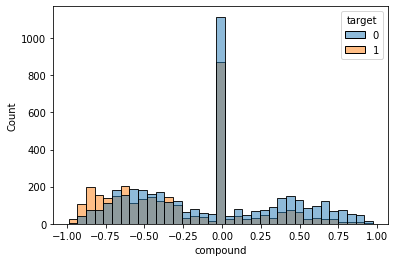

In [40]:
sns.histplot(data = train,x = 'compound' )

Above is the distribution of compound score w/ whether its identified a disaster vs no disaster tweet. There is some shift in the distribution where negative compound scores seem to correlate w/ more disaster tweets than not. Same vice versa. There are lots of sentences with a compound of 0.00 (not exactly sure what leads to a score of 0). Lets take a look at how the outputs of the analyzer relate.

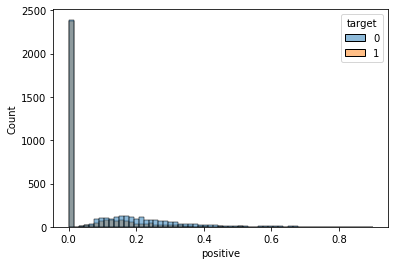

In [50]:
# had to remove any pos values of 0 from the histogram for better visualization (binrange = (0.000001, 1))
sns.histplot(data = train,x = 'positive', hue = 'target' )

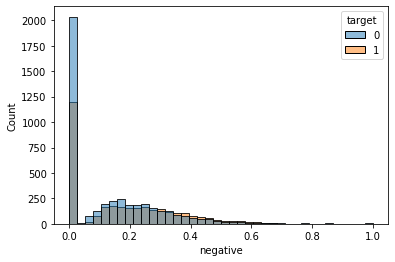

In [49]:
sns.histplot(data = train,x = 'negative', hue = 'target' )

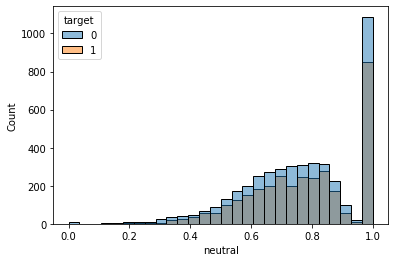

In [46]:
sns.histplot(data = train,x = 'neutral', hue = 'target')

Some interesting findings here. The distribution of non-disaster tweets vs disaster tweets seemed somewhat separated when using the positive analyzer values. Could be a useful feature. There was less of a difference in the neutral and negative analyzer values. Also, need to figure out how to deal with 0 values for these analyzer values. 